In [7]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 279.3 kB/s eta 0:07:28
   ---------------------------------------- 0.1/124.9 MB 717.5 kB/s eta 0:02:54
   ---------------------------------------- 0.5/124.9 MB 2.2 MB/s eta 0:00:58
   ---------------------------------------- 1.3/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 2.1/124.9 MB 6.9 MB/s eta 0:00:18
    --------------------------------------- 3.0/124.9 MB 8.6 MB/s eta 0:00:15
   - -------------------------------------- 3.7/124.9 MB 9.8 MB/s eta 0:00:13
   - -------------------------------------- 4.4/124.9 MB 10.1 MB/s eta 0:00:12
   - -------------------------------------- 5.0/124.9 MB 10.3 MB/s eta 0:00:12
   - -------------------------------------- 5.2/124.9 MB 10.1 MB/s eta 0:00:12


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [11]:
#Importing the Boston House Price Dataset
house_price_dataset = pd.read_csv('housing.csv')

In [12]:
house_price_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
print(house_price_dataset)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [15]:
house_price_dataset.shape

(545, 13)

In [16]:
house_price_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
#statistical measures of the dataset ( mean,median,mode)
house_price_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for column in columns_to_encode:
    house_price_dataset[column] = label_encoder.fit_transform(house_price_dataset[column])

In [29]:
house_price_dataset.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [30]:
#Understanding the correlation between various features in the dataset
#types : 1. Positive Correlation 2.Negative correlation
correlation = house_price_dataset.corr()

<Axes: >

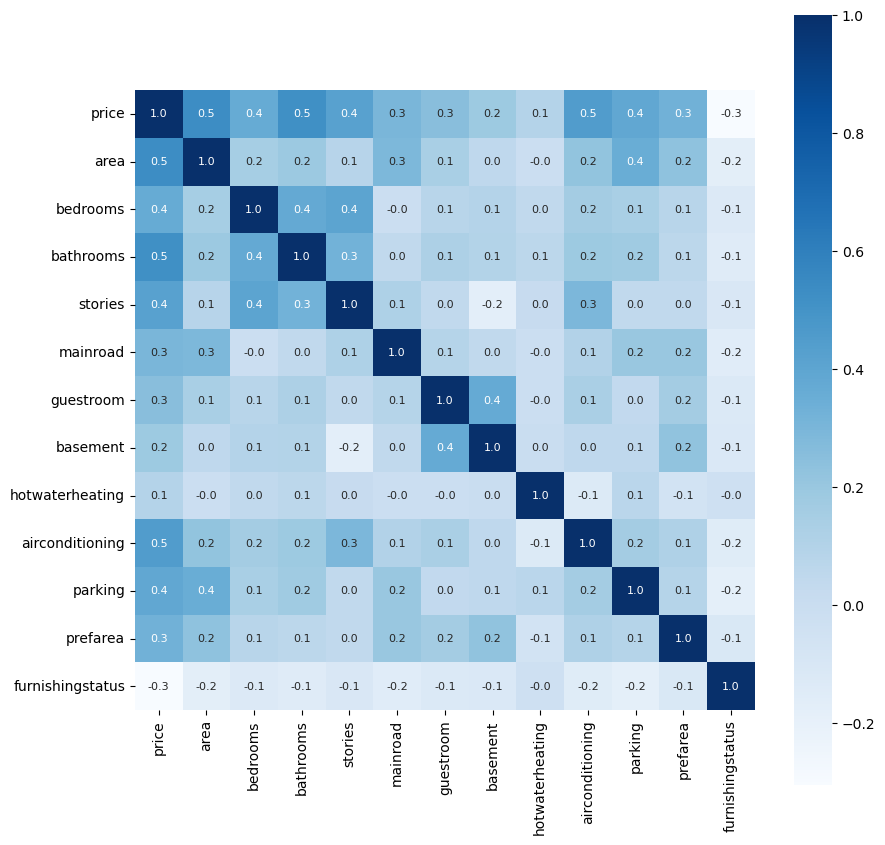

In [31]:
#constructing the head map to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [32]:
#spliting the data and target
X = house_price_dataset.drop(['price'],axis=1)
Y = house_price_dataset['price']
print(X)
print(Y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [33]:
#Spliting the data into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(545, 12) (436, 12) (109, 12)


In [35]:
#Model Training using XGBoost Regressor
#loading the model
model = XGBRegressor()

In [36]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
#Evaluate the model
#prediction on training data
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [38]:
print(training_data_prediction)

[ 3424222.   4270767.   2683287.   4791449.5  4129676.   6953162.
  2877948.2  2689605.   6933238.   4681389.5  3316203.8  2900007.8
  6003467.   5804279.   7766756.5  4123577.   5245065.   4591470.5
  7756017.5  4219297.5  4168722.2  2690382.2  5239920.5  4396851.
  3918579.2  4042381.   6799842.   9215863.   4642376.5  3237656.8
  3760464.   3075951.5  2362834.5  4035899.   4268145.   2839288.5
  4858737.5  3643904.8  1921622.5  7990241.5  4081057.2 12234883.
  8546704.   7393369.5  4020822.8  3205431.8  4303169.   3587664.
  3376537.5  2473200.5  5921071.   4051300.5  3857848.8  3180712.2
  4045365.2  5352052.   3652279.5  3790807.5  3622467.8  4138339.
  7544263.   4306240.5  5928919.   2996695.5  3796975.8  5526313.
  6702700.5  5857141.5  5406529.5  5620276.   3333574.2  3630378.8
  2862753.5  4958216.   5244960.5  3710378.8  5884058.   4211315.5
  6746079.5  5397818.   3119843.2  3564199.8  6575148.   4889165.5
  5866716.5  8390791.   2687594.   3291622.2  9790258.   4098177.5
 

In [39]:
#R squared error
score_1 = metrics.r2_score(Y_train,training_data_prediction)
#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R Squared Error : ",score_1)
print("Mean Absolute Error : ",score_2)

R Squared Error :  0.9968795625957642
Mean Absolute Error :  59136.664277522934


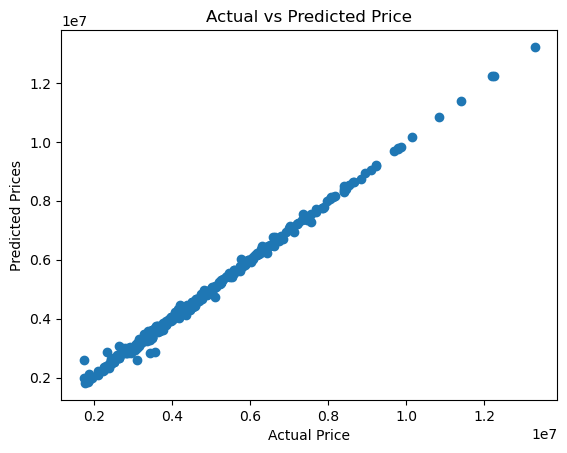

In [44]:
#Visuablize the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Price")
plt.show()

In [40]:
#prediction on TEST DATA
test_data_prediction = model.predict(X_test)

In [43]:
#R squared error
score_1 = metrics.r2_score(Y_test,test_data_prediction)
#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("R Squared Error : ",score_1)
print("Mean Absolute Error : ",score_2)

R Squared Error :  0.4463415529918807
Mean Absolute Error :  948763.2901376147
